<a href="https://colab.research.google.com/github/nikm7777/D-code/blob/main/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_trans=pd.read_csv("/content/drive/MyDrive/ML _Project/Data/train_transaction.csv")
df_identity=pd.read_csv("/content/drive/MyDrive/ML _Project/Data/train_identity.csv")

In [ ]:
#test_trans=pd.read_csv("/content/drive/MyDrive/ML _Project/Data/test_transaction.csv")
#test_identity=pd.read_csv("/content/drive/MyDrive/ML _Project/Data/test_identity.csv")

In [ ]:
df_trans.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [ ]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [ ]:
df_identity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

In [ ]:
df=pd.merge(df_trans, df_identity, on = "TransactionID",how='left')#doing left join
#test=pd.merge(test_trans, test_identity, on = "TransactionID",how='left')

In [ ]:
df.shape

(590540, 434)

In [ ]:
len(df.columns)

434

In [ ]:
for i in df.columns: #removing the columns with more than 20% null values
    if sum(df[i].isnull())/df.shape[0] > 0.2:
        del df[i]

In [ ]:
len(df.columns)

182

In [ ]:
df=df.dropna(axis=0)#dropping the rows that have the null values

In [ ]:
df=df.drop(['TransactionID'],axis=1)

In [ ]:
df

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
1,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,credit,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,debit,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,debit,...,135.000000,0.000000,0.000000,0.000000,50.0,1404.0,790.0,0.000000,0.000000,0.000000
5,0,86510,49.00,W,5937,555.0,150.0,visa,226.0,debit,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
6,0,86522,159.00,W,12308,360.0,150.0,visa,166.0,debit,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590533,0,15811029,107.95,W,13071,321.0,150.0,visa,226.0,debit,...,209.949997,209.949997,209.949997,209.949997,0.0,0.0,0.0,0.000000,0.000000,0.000000
590536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,debit,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,debit,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,debit,...,117.000000,317.500000,669.500000,317.500000,0.0,2234.0,0.0,0.000000,0.000000,0.000000


In [ ]:
X_df=df.loc[:, df.columns != 'isFraud']

In [ ]:
X_df

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
1,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,86469,59.00,W,4663,490.0,150.0,visa,166.0,debit,330.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,...,135.000000,0.000000,0.000000,0.000000,50.0,1404.0,790.0,0.000000,0.000000,0.000000
5,86510,49.00,W,5937,555.0,150.0,visa,226.0,debit,272.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
6,86522,159.00,W,12308,360.0,150.0,visa,166.0,debit,126.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590533,15811029,107.95,W,13071,321.0,150.0,visa,226.0,debit,485.0,...,209.949997,209.949997,209.949997,209.949997,0.0,0.0,0.0,0.000000,0.000000,0.000000
590536,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,debit,204.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590537,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,debit,231.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590538,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,debit,387.0,...,117.000000,317.500000,669.500000,317.500000,0.0,2234.0,0.0,0.000000,0.000000,0.000000


In [ ]:
y=df['isFraud'].values

In [ ]:
features=X_df.columns.values

In [ ]:
len(features)

180

In [ ]:
categorical_cols = (X_df.dtypes == 'object')
categorical_cols = list(categorical_cols[categorical_cols].index)

In [ ]:
categorical_cols

['ProductCD', 'card4', 'card6', 'P_emaildomain']

In [ ]:
def encoding_cat_features_fit(df, columns_to_labelencode): #fitting the encoding
    codings = {}
    for i in columns_to_labelencode:
      encoder = LabelEncoder()
      encoder.fit(df[i].astype(str).values)
      codings[i] = encoder
    return codings

def encoding_cat_features_transform(df, codings): #transforming the encoding
    out = pd.DataFrame(index=df.index)
    for c in codings.keys():
      out[c] = codings[c].transform(df[c].astype(str).values)
    return out

categorial_features_encoding = encoding_cat_features_fit(X_df, categorical_cols)
temp = encoding_cat_features_transform(X_df, categorial_features_encoding) #temporary dataframe which has the encoded features of the categorical features
X_df = X_df.drop(categorical_cols, axis=1).merge(temp, how='left', left_index=True, right_index=True) #Dropping the non_encoded categorical features and replacing with the encoded features
del temp  #deleting the temporary dataframe to free up the memory space

In [ ]:
X_df.columns

Index(['TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5',
       'addr1', 'addr2', 'C1', 'C2',
       ...
       'V316', 'V317', 'V318', 'V319', 'V320', 'V321', 'ProductCD', 'card4',
       'card6', 'P_emaildomain'],
      dtype='object', length=180)

In [ ]:
known_features=['TransactionDT', 'TransactionAmt', 'ProductCD',
       'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1',
       'addr2', 'P_emaildomain']

In [ ]:
anonymous_features=list(set(features)-set(known_features))#filtering and storing the anonymous features

In [ ]:
len(features)

180

In [ ]:
len(known_features)

12

In [ ]:
len(anonymous_features)

168

In [ ]:
anon_df=X_df[anonymous_features]#defining the dataframe with the anonymous features

In [ ]:
len(anonymous_features)+len(known_features)#checking the total length to be equal to the orignal dataset

180

In [ ]:
(X_df.isna().sum()).value_counts() # so all the columns have no null values

0    180
dtype: int64

In [ ]:
def reduce_mem_usage(df):
    start_mem_usg = df.memory_usage().sum() / 1024**2
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in.
    for col in df.columns:
        if df[col].dtype != object:  # Exclude strings
            # Print current column type
            print("******************************")
            print("Column: ",col)
            print("dtype before: ",df[col].dtype)
            # make variables for Int, max and min
            IsInt = False
            mx = df[col].max()
            mn = df[col].min()
            print("min for this col: ",mn)
            print("max for this col: ",mx)
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(df[col]).all():
                NAlist.append(col)
                df[col].fillna(mn-1,inplace=True)

            # test if column can be converted to an integer
            asint = df[col].fillna(0).astype(np.int64)
            result = (df[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        df[col] = df[col].astype(np.uint8)
                    elif mx < 65535:
                        df[col] = df[col].astype(np.uint16)
                    elif mx < 4294967295:
                        df[col] = df[col].astype(np.uint32)
                    else:
                        df[col] = df[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)
            # Make float datatypes 32 bit
            else:
                df[col] = df[col].astype(np.float32)

            # Print new column type
            print("dtype after: ",df[col].dtype)
            print("******************************")
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = df.memory_usage().sum() / 1024**2
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return df, NAlist

In [ ]:
reduce_mem_usage(X_df)

Memory usage of properties dataframe is : 487.0844955444336  MB
******************************
Column:  TransactionDT
dtype before:  int64
min for this col:  86401
max for this col:  15811131
dtype after:  uint32
******************************
******************************
Column:  TransactionAmt
dtype before:  float64
min for this col:  0.615
max for this col:  31937.391
dtype after:  float32
******************************
******************************
Column:  card1
dtype before:  int64
min for this col:  1001
max for this col:  18395
dtype after:  uint16
******************************
******************************
Column:  card2
dtype before:  float64
min for this col:  100.0
max for this col:  600.0
dtype after:  uint16
******************************
******************************
Column:  card3
dtype before:  float64
min for this col:  100.0
max for this col:  231.0
dtype after:  uint8
******************************
******************************
Column:  card5
dtype before:  f

(        TransactionDT  TransactionAmt  card1  card2  card3  card5  addr1  \
 1               86401       29.000000   2755    404    150    102    325   
 2               86469       59.000000   4663    490    150    166    330   
 3               86499       50.000000  18132    567    150    117    476   
 5               86510       49.000000   5937    555    150    226    272   
 6               86522      159.000000  12308    360    150    166    126   
 ...               ...             ...    ...    ...    ...    ...    ...   
 590533       15811029      107.949997  13071    321    150    226    485   
 590536       15811049       39.500000  10444    225    150    224    204   
 590537       15811079       30.950001  12037    595    150    224    231   
 590538       15811088      117.000000   7826    481    150    224    387   
 590539       15811131      279.950012  15066    170    150    102    299   
 
         addr2  C1  C2  ...  V316    V317   V318        V319        V320  

In [ ]:
from imblearn.over_sampling import ADASYN

X_resampled, y_resampled = ADASYN().fit_resample(X_df, y)


print('After OverSampling, the shape of train dataset x: {}'.format(X_resampled.shape))
print('After OverSampling, the shape of train dataset y: {} \n'.format(y_resampled.shape))

print("After OverSampling, counts of class '1': {}".format(sum(y_resampled == 1)))
print("After OverSampling, counts of class '0': {}".format(sum(y_resampled == 0)))

After OverSampling, the shape of train dataset x: (678206, 180)
After OverSampling, the shape of train dataset y: (678206,) 

After OverSampling, counts of class '1': 338260
After OverSampling, counts of class '0': 339946


In [ ]:
X_train=X_resampled
y_train=y_resampled

In [ ]:
X_train[X_train.columns] = StandardScaler().fit_transform(X_train)

Text(0, 0.5, 'Proportional Cumlative explained variance')

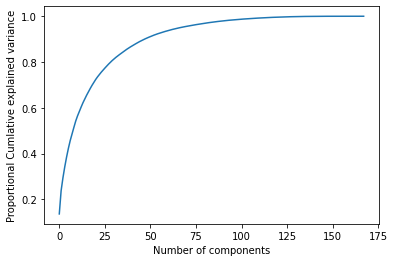

In [ ]:
pca = PCA().fit(X_train[anonymous_features]) #fitting only for the anonymous features
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Proportional Cumlative explained variance")

In [ ]:
pca_v=[] #empty list to store the 50 column names after PCA transformation
for i in range(50):
  pca_v.append("A_{}".format(i+1))

In [ ]:
pca = PCA(n_components = 50)
pca_fit_train_v = pca.fit_transform(X_train[anonymous_features])

X_train[pca_v] = pd.DataFrame(data = pca_fit_train_v)#adding the transformed 50 columns to the dataframe

In [ ]:
X=X_train.drop(anonymous_features,axis=1)

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
X.to_csv('/content/drive/MyDrive/ML _Project/X_train1.csv')


In [ ]:
pd.DataFrame(y_resampled).to_csv('/content/drive/MyDrive/ML _Project/Y_train1.csv')

In [ ]:
((X.isnull().sum())==0).sum()#no null values in any of the columns(12-->known features,50-->principal components)

62

In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X.to_numpy(), y_train, scoring="accuracy", cv=cv, n_jobs=-1)
# report performance
print('AUC Score_mean: %.3f AUC Score_std(%.3f)' % (mean(scores), std(scores)))


AUC Score_mean: 0.806 AUC Score_std(0.001)


In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
all_accuracy=[]
all_precision=[]
all_recall=[]
def classifier(classification=[],model_name=[]):
  iterable=zip(classification,model_name)
  for i,j in iterable:
    algo=i
    scores_accuracy = cross_val_score(algo, X.to_numpy(), y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    scores_precision=cross_val_score(algo, X.to_numpy(), y_train, scoring='precision', cv=cv, n_jobs=-1)
    scores_recall=cross_val_score(algo, X.to_numpy(), y_train, scoring='recall', cv=cv, n_jobs=-1)
    output(mean(scores_accuracy),mean(scores_precision),mean(scores_recall),std(scores_accuracy),std(scores_precision),std(scores_recall),j)

def output(mean_accuracy,mean_precision,mean_recall,std_accuracy,std_precision,std_recall, model_name):
  global all_accuracy
  global all_precision
  global all_recall
  all_accuracy.append(mean_accuracy)
  all_precision.append(mean_precision)
  all_recall.append(mean_recall)

  print("********************************For {} model***********************".format(model_name))
  print("The performance metrics are\n")
  print("     Mean Accuracy: {}\n".format(mean_accuracy))
  print("     Mean Precision: {}\n".format(mean_precision))
  print("     Mean Recall: {}\n".format(mean_recall))

  print("     Standard deviation Accuracy: {}\n".format(std_accuracy))
  print("     Standard Deviation Precision: {}\n".format(std_precision))
  print("     Standard Deviation Recall: {}\n".format(std_recall))





algo=[LogisticRegression(),LinearDiscriminantAnalysis(),QuadraticDiscriminantAnalysis(),GaussianNB()]
model_name=['LOGISTIC REGRESSION','LINIEAR DISCRIMINANT ANALYSIS','QUADRATIC DISCRIMINANT ANALYSIS','NAIVE BAYES']
classifier(algo,model_name)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


********************************For LOGISTIC REGRESSION model***********************
The performance metrics are

     Mean Accuracy: 0.8063434964637146

     Mean Precision: 0.8050371211253395

     Mean Recall: 0.8072144924266326

     Standard deviation Accuracy: 0.0014199891159108371

     Standard Deviation Precision: 0.001544787086153349

     Standard Deviation Recall: 0.0026432710688619695

********************************For LINIEAR DISCRIMINANT ANALYSIS model***********************
The performance metrics are

     Mean Accuracy: 0.7981778360388196

     Mean Precision: 0.7948577136958003

     Mean Recall: 0.8024574664428036

     Standard deviation Accuracy: 0.0014509087273870958

     Standard Deviation Precision: 0.0018066684212055177

     Standard Deviation Recall: 0.002645622890426672

********************************For QUADRATIC DISCRIMINANT ANALYSIS model***********************
The performance metrics are

     Mean Accuracy: 0.6849275719768011

     Mean Precision:

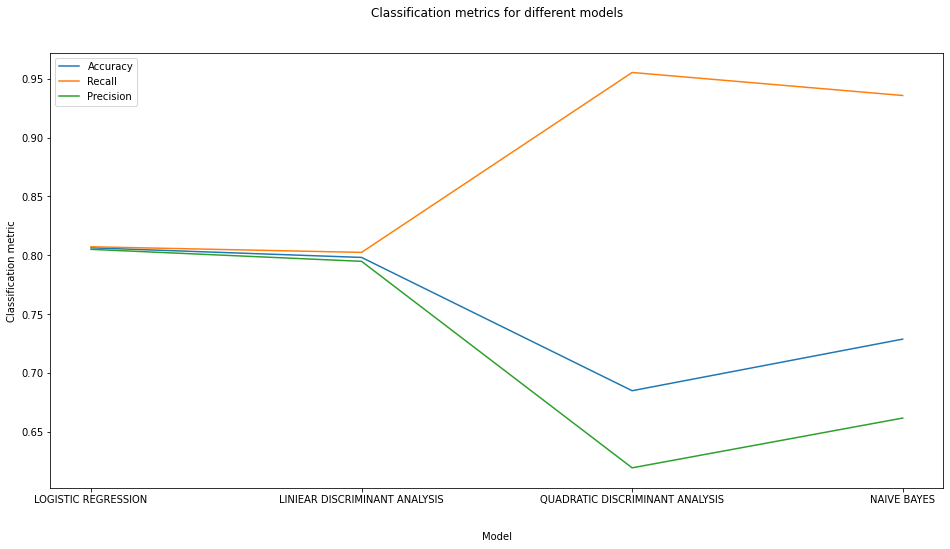

In [ ]:
fig, ax = plt.subplots(1, figsize=(16,8))
sns.lineplot(x=['LOGISTIC REGRESSION','LINIEAR DISCRIMINANT ANALYSIS','QUADRATIC DISCRIMINANT ANALYSIS','NAIVE BAYES'],
             y=all_accuracy)
sns.lineplot(x=['LOGISTIC REGRESSION','LINIEAR DISCRIMINANT ANALYSIS','QUADRATIC DISCRIMINANT ANALYSIS','NAIVE BAYES'],
             y=all_recall)
sns.lineplot(x=['LOGISTIC REGRESSION','LINIEAR DISCRIMINANT ANALYSIS','QUADRATIC DISCRIMINANT ANALYSIS','NAIVE BAYES'],
             y=all_precision)

ax.set_title('Classification metrics for different models\n\n')
ax.set_xlabel('\n\nModel')
ax.set_ylabel('Classification metric')
ax.legend(['Accuracy', 'Recall','Precision'])

In [ ]:
def classifier(classification=[],model=[]):
    iterable=zip(classification,model)
    for i,j in iterable:
        algo = i
        algo.fit(X,y)
        train_pred=algo.predict(X)
        test_pred=algo.predict(df3_test)

        train_accuracy,train_error,train_report,train_cf_matrix=metrics(train_pred,y_train)
        test_accuracy,test_error,test_report,test_cf_matrix=metrics(test_pred,df3_test_label)

        output(train_accuracy,test_accuracy,train_error,test_error,train_report,
               test_report,test_pred,df3_test_label,train_cf_matrix,test_cf_matrix,j)

In [ ]:
#Defining the function for printing the required output

def output(train_accuracy,test_accuracy,train_error,test_error,valid_report,
           test_report,pred,label,valid_cf_matrix,test_cf_matrix,model):

    print("*****************************************FOR {} MODEL:*******************************************\n\n".format(model))
    print("##################TRAINING#################\n\n")
    print("The training accuracy  is {}% and the training error is {}%\n".format(train_accuracy,train_error*100))

    print("The classification report for training data is given by \n\n{} ".format(valid_report))


    fig, ax = plt.subplots(1,2, figsize=(12,6))


    sns.heatmap(valid_cf_matrix, annot=True, cmap='cividis',ax=ax[0])

    ax[0].set_title('Confusion Matrix for Training Data\n\n\n')
    ax[0].set_xlabel('Predicted')
    ax[0].set_ylabel('Actual')


    ax[0].xaxis.set_ticklabels(['False','True'])
    ax[0].yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.


    print("##################TEST###################\n\n")
    print("The testing accuracy is {}% and the testing error is {}%\n".format(train_accuracy,test_error*100))

    print("The classification report for test data is given by \n\n{} ".format(test_report))

    sns.heatmap(test_cf_matrix, annot=True, cmap='Wistia',ax=ax[1])

    ax[1].set_title('Confusion Matrix for Testing Data\n\n\n')
    ax[1].set_xlabel('Predicted')
    ax[1].set_ylabel('Actual')


    ax[1].xaxis.set_ticklabels(['False','True'])
    ax[1].yaxis.set_ticklabels(['False','True'])

    print("##########################CONFUSION MATRIX FOR TRAINING AND TEST DATA############################")

    ## Display the visualization of the Confusion Matrix.
    plt.show()

    return None


def classifier(classification=[],model=[]):
    iterable=zip(classification,model)
    for i,j in iterable:
        algo = i
        algo.fit(X,y)
        train_pred=algo.predict(X)
        test_pred=algo.predict(df3_test)

        train_accuracy,train_error,train_report,train_cf_matrix=metrics(train_pred,y_train)
        test_accuracy,test_error,test_report,test_cf_matrix=metrics(test_pred,df3_test_label)

        output(train_accuracy,test_accuracy,train_error,test_error,train_report,
               test_report,test_pred,df3_test_label,train_cf_matrix,test_cf_matrix,j)



algo=[LogisticRegression(),LinearDiscriminantAnalysis(),QuadraticDiscriminantAnalysis(),GaussianNB()]
model_name=['LOGISTIC REGRESSION','LINIEAR DISCRIMINANT ANALYSIS','QUADRATIC DISCRIMINANT ANALYSIS','NAIVE BAYES']
classifier(algo,model_name)
fig, ax = plt.subplots(1, figsize=(12,6))
sns.lineplot(x=['LOGISTIC REGRESSION','LINIEAR DISCRIMINANT ANALYSIS','QUADRATIC DISCRIMINANT ANALYSIS','NAIVE BAYES'],
             y=comp_error[::2])
sns.lineplot(x=['LOGISTIC REGRESSION','LINIEAR DISCRIMINANT ANALYSIS','QUADRATIC DISCRIMINANT ANALYSIS','NAIVE BAYES'],
             y=comp_error[1::2])

ax.set_title('Classification error comparison for different models\n\n')
ax.set_xlabel('\n\nModel')
ax.set_ylabel('Classification error')
ax.legend(['Training Error', 'Testing Error'])


error_models=pd.DataFrame()
error_models['MODELS']=model_name
error_models['TRAINING_ERROR']=comp_error[::2]
error_models['TESTING_ERROR']=comp_error[1::2]
print(error_models.to_string(index=False))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# create model
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# evaluate model
scores = cross_val_score(rf, X.to_numpy(), y_train, scoring="accuracy", cv=cv, n_jobs=-1)
# report performance
print('AUC Score_mean: %.3f AUC Score_std(%.3f)' % (mean(scores), std(scores)))


In [ ]:
# Import tools needed for visualization
rf.fit(X, y_train)
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

After OverSampling, the shape of train dataset x: (678206, 180)
After OverSampling, the shape of train dataset y: (678206,) 

After OverSampling, counts of class '1': 338260
After OverSampling, counts of class '0': 339946
